# Day 08. Exercise 05
# Clustering

## 0. Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


In [3]:
df.drop(columns=['pageviews'], inplace=True)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


In [4]:
X = df[['num_commits', 'AVG(diff)']]
y = df['uid']

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
kmeans = KMeans(n_clusters=3, random_state=21)
df['Cluster'] = kmeans.fit_predict(X)
df.head()

,uid,num_commits,AVG(diff),Cluster
0,user_1,62,-64.400000,0
1,user_10,20,-74.800000,0
2,user_14,61,-159.000000,1
3,user_17,51,-61.600000,0
4,user_18,5,-5.666667,0


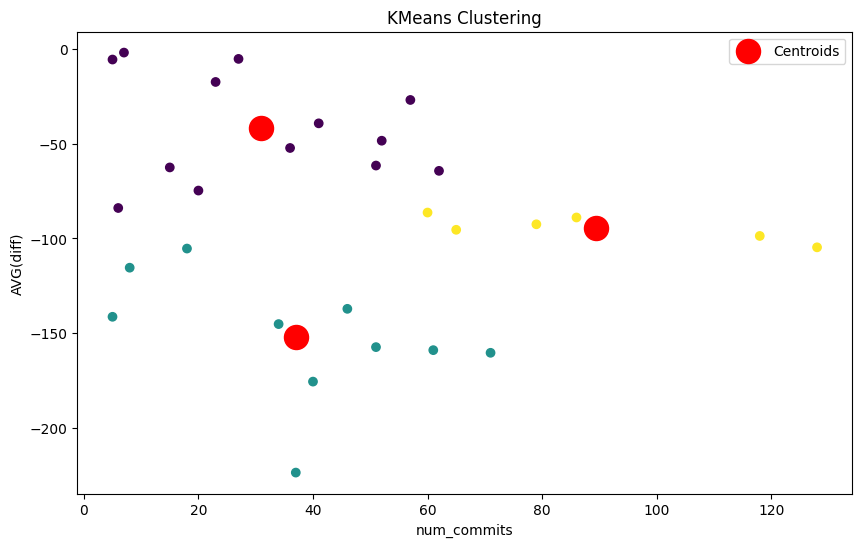

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

In [7]:
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.45


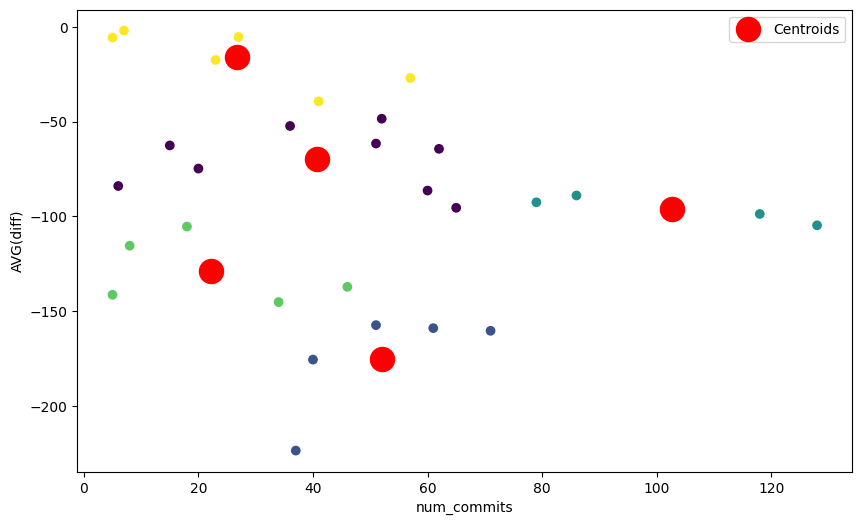

In [8]:
kmeans = KMeans(n_clusters=5, random_state=21)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

In [9]:
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.35


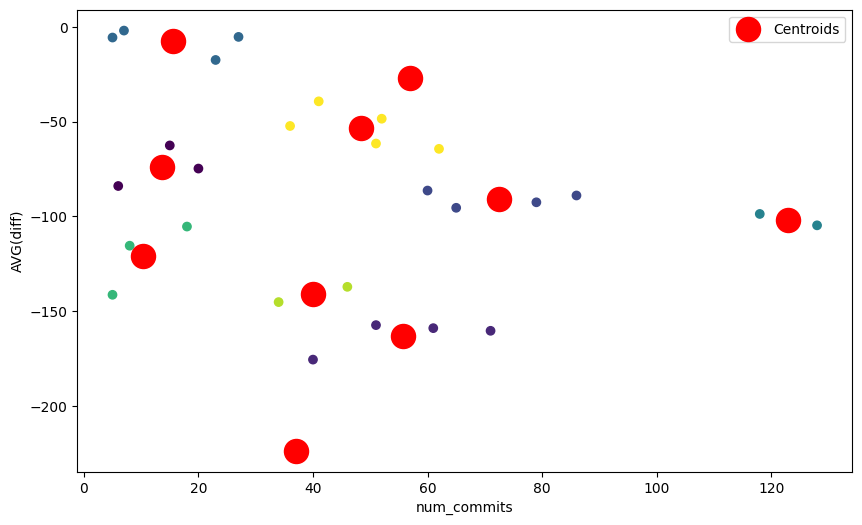

In [10]:
kmeans = KMeans(n_clusters=10, random_state=21)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

In [11]:
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.43


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [12]:
dbscan = DBSCAN(eps=20, min_samples=2)
df['Cluster'] = dbscan.fit_predict(X)

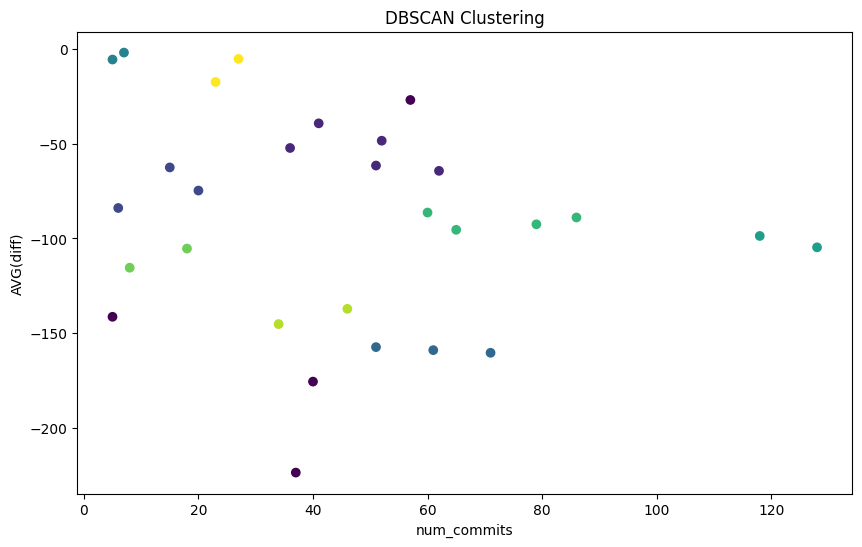

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

In [14]:
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.38


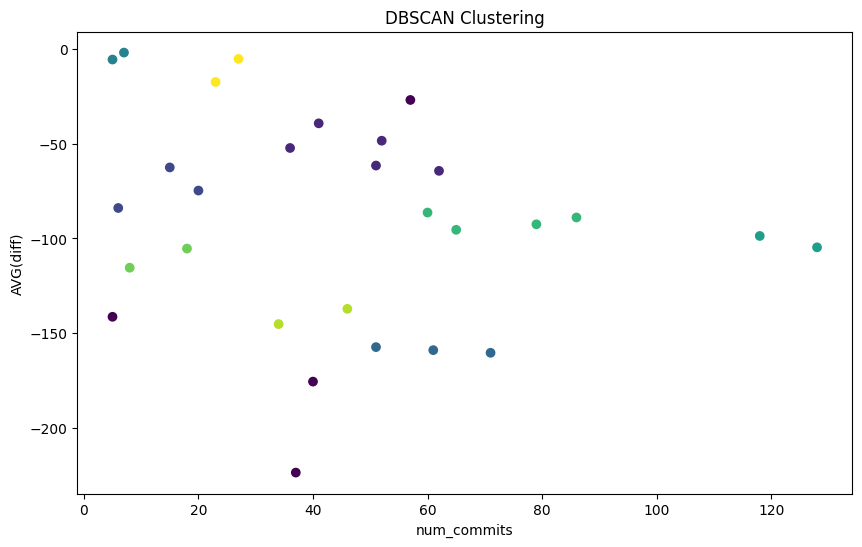

In [15]:
# min_samples=6
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

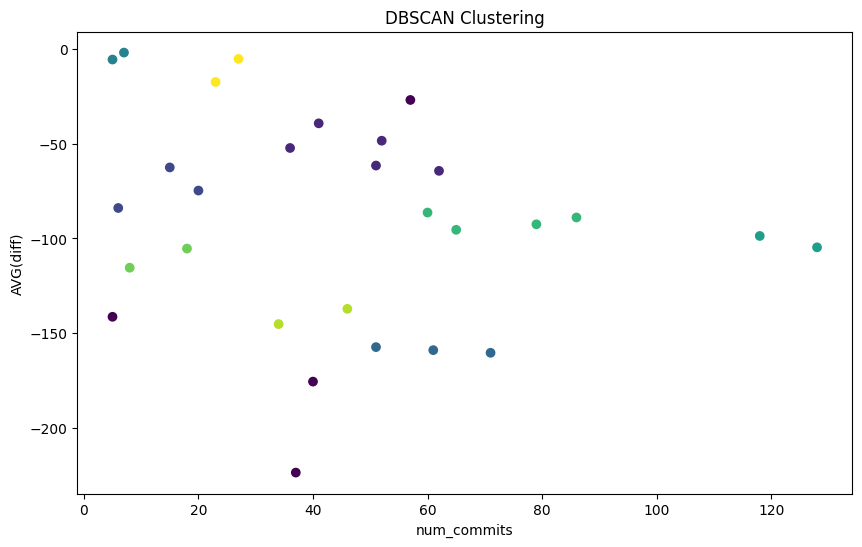

In [16]:
# eps=10
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [17]:
n_clusters = 5
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster'] = agg_clust.fit_predict(X)

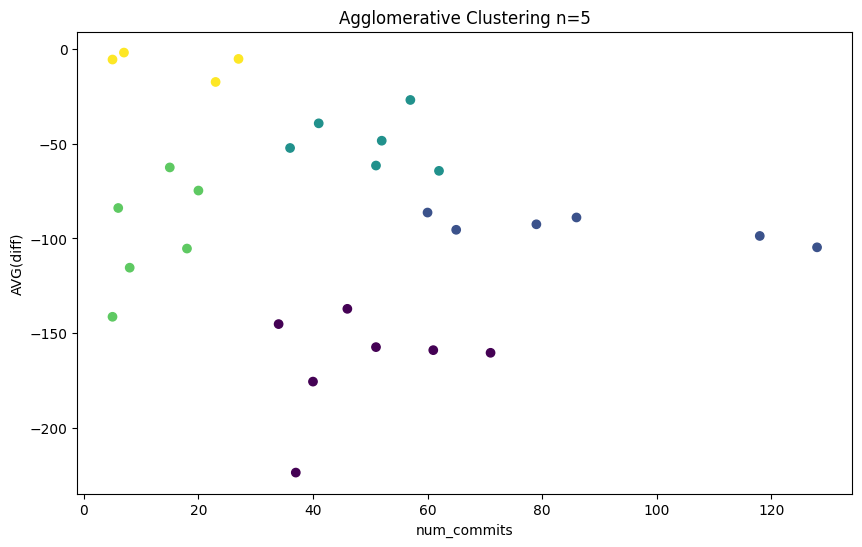

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering n=5')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

In [19]:
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.46


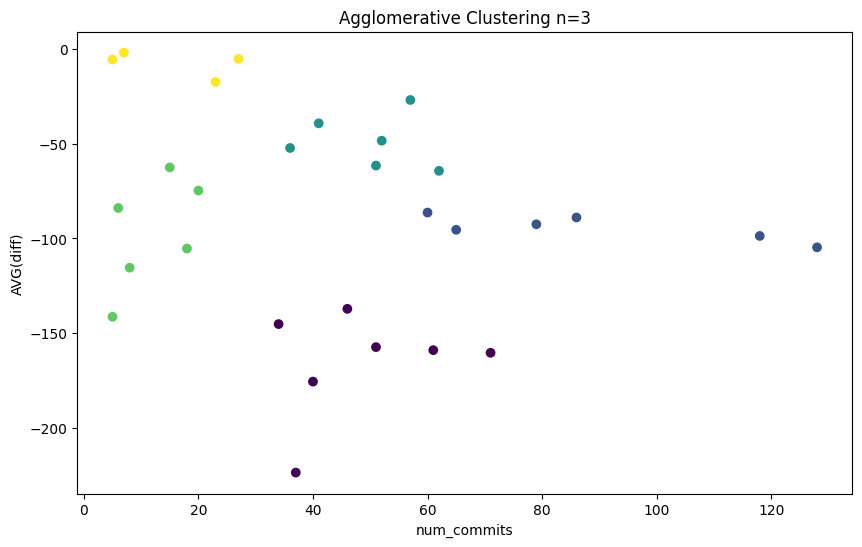

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering n=3')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

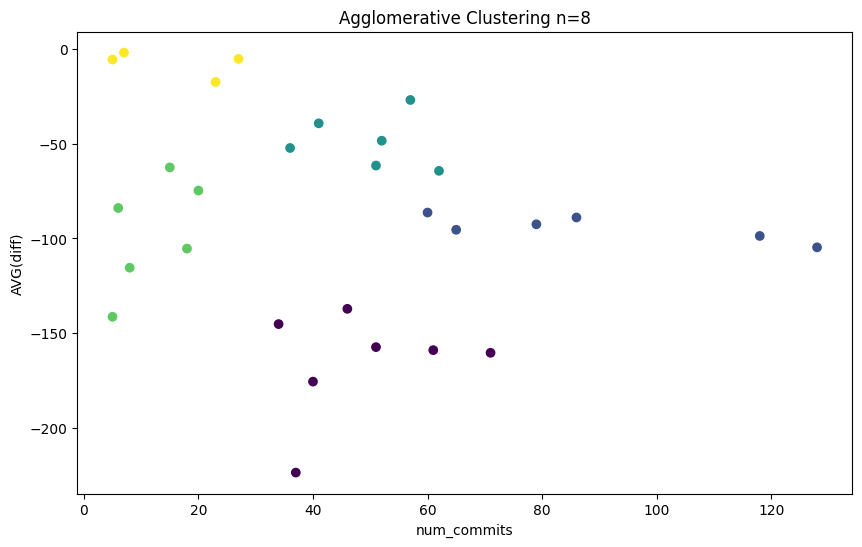

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering n=8')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

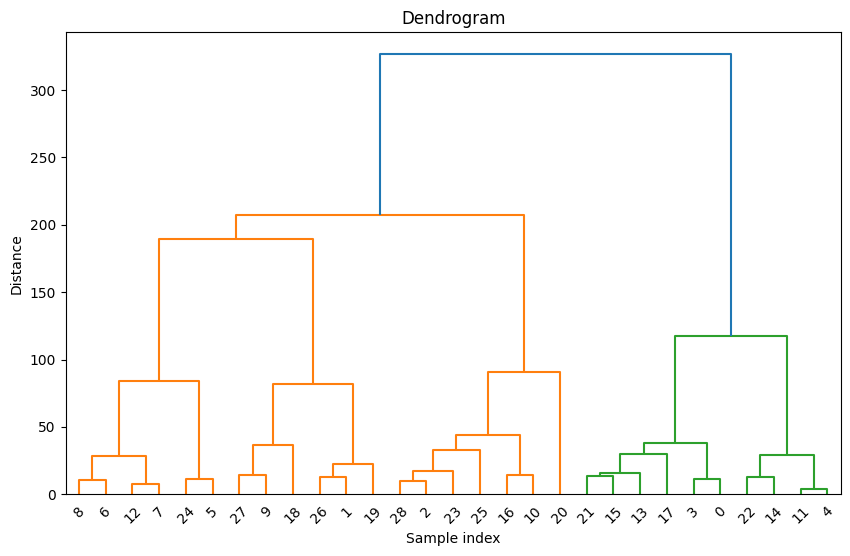

In [22]:
plt.figure(figsize=(10, 6))
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [23]:
def optimize_clustering(model_class, model_params, param_name, param_range, X):
    silhouette_scores = []
    best_score = -1
    best_param_value = None

    for value in param_range:
        
        model_params[param_name] = value
        model = model_class(**model_params)
        labels = model.fit_predict(X)

        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

        if score > best_score:
            best_score = score
            best_param_value = value
            
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(param_range, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score vs. Parameter Value')
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel('Silhouette Score')
    axs[0].axvline(best_param_value, color='r', linestyle='--', label='Best Value')
    axs[0].legend()

    model_params[param_name] = best_param_value
    best_model = model_class(**model_params)
    best_labels = best_model.fit_predict(X)

    axs[1].scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='o')
    axs[1].set_title(f'Clustering with Best {param_name} = {best_param_value}')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

    return best_param_value, best_score

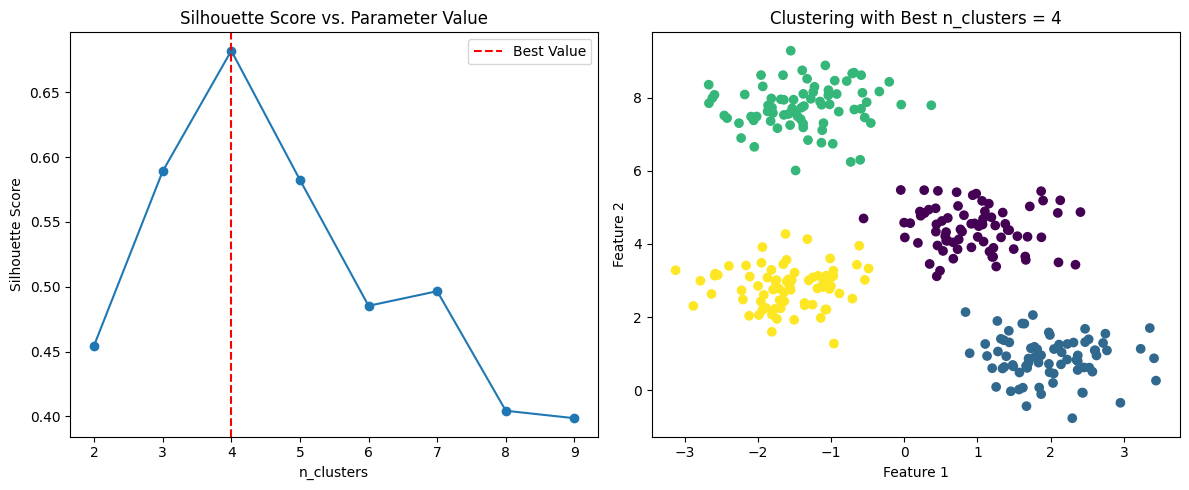

In [26]:
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    model_class = KMeans
    model_params = {'n_clusters': 4, 'random_state': 0}
    param_name = 'n_clusters'
    param_range = range(2, 10) 

    best_value, best_score = optimize_clustering(model_class, model_params, param_name, param_range, X)

In [29]:
print(f'best_value: {best_value}\nbest_score: {best_score}')

best_value: 4
best_score: 0.6819938690643478
